In [202]:
# Example Nifty 50 constituents (verify current list as this may change)
nifty50_symbols = [
    'RELIANCE.NS', 'TCS.NS', 'ICICIBANK.NS', 'HINDUNILVR.NS',
    'INFY.NS', 'ITC.NS', 'KOTAKBANK.NS', 'HDFC.NS', 'SBIN.NS',
    'BHARTIARTL.NS', 'LT.NS', 'BAJFINANCE.NS', 'ASIANPAINT.NS', 'HCLTECH.NS',
    'MARUTI.NS', 'TITAN.NS', 'SUNPHARMA.NS', 'AXISBANK.NS', 'M&M.NS',
    'ULTRACEMCO.NS', 'WIPRO.NS', 'NESTLEIND.NS', 'ONGC.NS', 'ADANIPORTS.NS',
    'NTPC.NS', 'JSWSTEEL.NS', 'POWERGRID.NS', 'TATASTEEL.NS', 'BAJAJ-AUTO.NS',
    'GRASIM.NS', 'TECHM.NS', 'BRITANNIA.NS', 'INDUSINDBK.NS', 'CIPLA.NS',
    'COALINDIA.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'UPL.NS', 'SHREECEM.NS',
    'HEROMOTOCO.NS', 'IOC.NS', 'BPCL.NS', 'GAIL.NS', 'HDFCLIFE.NS',
    'SBILIFE.NS', 'DIVISLAB.NS', 'BAJAJFINSV.NS', 'TATAMOTORS.NS'
]
# Remove HDFC.NS from your list
nifty50_symbols = [ticker for ticker in nifty50_symbols if ticker != 'HDFC.NS']

In [203]:
import yfinance as yf
import pandas as pd

# Download price data
data = yf.download(
    tickers=nifty50_symbols,
    period="5y",  # 5 years of data for momentum factors
    interval="1d",
    group_by='ticker',
    auto_adjust=True  # Use adjusted prices
)


[*********************100%***********************]  47 of 47 completed


In [220]:
data.head

<bound method NDFrame.head of Ticker        WIPRO.NS                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2020-06-23  104.998118  108.563172  104.021392  107.732956  14850298   
2020-06-24  109.393384  109.393384  106.243442  106.560875  16492172   
2020-06-25  105.950421  108.416657  105.144624  106.560875  10193692   
2020-06-26  107.098078  112.323564  106.609714  110.101509  38389012   
2020-06-29  108.441076  110.321270  106.805056  107.293419  13374148   
...                ...         ...         ...         ...       ...   
2025-06-17  262.890015  265.450012  261.660004  262.910004   7528454   
2025-06-18  262.899994  265.600006  261.029999  261.589996   5016660   
2025-06-19  262.850006  266.440002  261.809998  265.579987  14184486   
2025-06-20  266.000000  267.200012  262.869995  266.540009  12904674   
2025-06-23  264.000000  265.200012

In [204]:
# You'll need to get fundamental data - yfinance has limited fundamentals
# For better fundamental data, consider using another source

def get_value_factors(ticker):
    stock = yf.Ticker(ticker)
    try:
        # These may not always be available via yfinance
        pe = stock.info.get('trailingPE', None)
        pb = stock.info.get('priceToBook', None)
        ps = stock.info.get('priceToSalesTrailing12Months', None)
        return {'PE': pe, 'PB': pb, 'PS': ps}
    except:
        return {'PE': None, 'PB': None, 'PS': None}

value_factors = {ticker: get_value_factors(ticker) for ticker in nifty50_symbols}
value_df = pd.DataFrame.from_dict(value_factors, orient='index')

In [205]:
value_df.head

<bound method NDFrame.head of                       PE          PB          PS
RELIANCE.NS    28.309368    2.338183    2.043567
TCS.NS         25.261278   12.957866    4.808929
ICICIBANK.NS   19.981709    3.222425    5.049727
HINDUNILVR.NS  50.079243   10.820517    8.468739
INFY.NS        24.040068  585.798800  340.565340
ITC.NS         26.229404    7.393448    6.876468
KOTAKBANK.NS   19.621778    2.757302    6.121223
SBIN.NS         9.089026    1.448115    2.056412
BHARTIARTL.NS  34.595318   10.375963    6.707727
LT.NS          32.838818    5.046590    1.897025
BAJFINANCE.NS  34.173200    5.862202   15.365901
ASIANPAINT.NS  59.316223   11.194562    6.410893
HCLTECH.NS     26.600030  566.223400  333.368200
MARUTI.NS      27.501299    4.148517    2.611030
TITAN.NS       93.112880   26.750042    5.143763
SUNPHARMA.NS   36.442352    5.499049    7.586543
AXISBANK.NS    13.458596    2.108365    4.907854
M&M.NS         27.270355    4.542438    2.330273
ULTRACEMCO.NS  55.821550    4.762947   

In [206]:
def calculate_momentum(ticker_data, ticker):
    if ticker not in ticker_data.columns.get_level_values(0):
        return None
    
    # Get the close prices for this ticker
    closes = ticker_data[ticker]['Close']
    
    # 12-1 month momentum
    if len(closes) > 252:  # 1 year of trading days
        mom_12_1 = (closes.iloc[-1] / closes.iloc[-252]) - 1
    else:
        mom_12_1 = None
    
    # 6-1 month momentum
    if len(closes) > 126:  # 6 months
        mom_6_1 = (closes.iloc[-1] / closes.iloc[-126]) - 1
    else:
        mom_6_1 = None
    
    # 1 month momentum
    if len(closes) > 21:  # 1 month
        mom_1m = (closes.iloc[-1] / closes.iloc[-21]) - 1
    else:
        mom_1m = None
    
    return {'MOM_12_1': mom_12_1, 'MOM_6_1': mom_6_1, 'MOM_1M': mom_1m}

momentum_factors = {ticker: calculate_momentum(data, ticker) for ticker in nifty50_symbols}
momentum_df = pd.DataFrame.from_dict(momentum_factors, orient='index')

In [207]:
momentum_df.head

<bound method NDFrame.head of                MOM_12_1   MOM_6_1    MOM_1M
RELIANCE.NS   -0.001268  0.183957  0.015333
TCS.NS        -0.080694 -0.185762 -0.032097
ICICIBANK.NS   0.251540  0.103505 -0.027728
HINDUNILVR.NS -0.057191 -0.025775 -0.039712
INFY.NS        0.074917 -0.174655  0.016316
ITC.NS         0.010692 -0.082243 -0.048259
KOTAKBANK.NS   0.251786  0.239487  0.045374
SBIN.NS       -0.054578 -0.032100 -0.005287
BHARTIARTL.NS  0.398420  0.209961  0.048122
LT.NS          0.015489 -0.026700 -0.008654
BAJFINANCE.NS  0.279762  0.331419 -0.007608
ASIANPAINT.NS -0.208457 -0.002994 -0.018138
HCLTECH.NS     0.212645 -0.106301  0.017686
MARUTI.NS      0.047120  0.159160  0.022381
TITAN.NS       0.015833  0.044342 -0.028973
SUNPHARMA.NS   0.115574 -0.082697 -0.008114
AXISBANK.NS   -0.009467  0.094869 -0.000905
M&M.NS         0.076386  0.039922  0.017791
ULTRACEMCO.NS  0.047414 -0.019005 -0.020532
WIPRO.NS       0.083089 -0.141580  0.051950
NESTLEIND.NS  -0.056034  0.098967 -0.038672
ON

In [208]:
def calculate_volatility(ticker_data, ticker, lookback_days=252):
    if ticker not in ticker_data.columns.get_level_values(0):
        return None
    
    closes = ticker_data[ticker]['Close']
    returns = closes.pct_change().dropna()
    
    if len(returns) >= lookback_days:
        recent_returns = returns.iloc[-lookback_days:]
        vol = recent_returns.std() * (252 ** 0.5)  # Annualized
        return vol
    return None

volatility_factors = {ticker: calculate_volatility(data, ticker) for ticker in nifty50_symbols}
volatility_df = pd.DataFrame.from_dict(volatility_factors, orient='index', columns=['VOLATILITY'])

In [209]:
# Combine all factors
factors_df = pd.concat([value_df, momentum_df, volatility_df], axis=1)

# Rank stocks based on each factor
factors_df['PE_RANK'] = factors_df['PE'].rank(ascending=True)  # Lower PE is better
factors_df['PB_RANK'] = factors_df['PB'].rank(ascending=True)
factors_df['MOM_RANK'] = factors_df['MOM_12_1'].rank(ascending=False)  # Higher momentum better
factors_df['VOL_RANK'] = factors_df['VOLATILITY'].rank(ascending=True)  # Lower vol better

# Create composite score (equal weighting for example)
factors_df['COMPOSITE_SCORE'] = (
    factors_df['PE_RANK'] + 
    factors_df['PB_RANK'] + 
    factors_df['MOM_RANK'] + 
    factors_df['VOL_RANK']
)

# Select top 10 stocks for portfolio
portfolio = factors_df.nlargest(10, 'COMPOSITE_SCORE')
print(portfolio[['PE', 'PB', 'MOM_12_1', 'VOLATILITY', 'COMPOSITE_SCORE']])

                      PE          PB  MOM_12_1  VOLATILITY  COMPOSITE_SCORE
BAJAJ-AUTO.NS  31.626654    6.568309 -0.122787    0.288971            140.0
TITAN.NS       93.112880   26.750042  0.015833    0.228973            131.0
ASIANPAINT.NS  59.316223   11.194562 -0.208457    0.208545            130.0
ADANIPORTS.NS  26.352850    4.699875 -0.060072    0.327084            128.0
TATASTEEL.NS   55.631386    2.087167 -0.116057    0.283932            124.0
DIVISLAB.NS    80.533980   11.771969  0.490441    0.283070            123.0
NESTLEIND.NS   70.886420   56.718680 -0.056034    0.179771            121.0
INDUSINDBK.NS  25.436100    1.008992 -0.444298    0.430812            115.0
HINDUNILVR.NS  50.079243   10.820517 -0.057191    0.189147            111.0
HCLTECH.NS     26.600030  566.223400  0.212645    0.261413            111.0


In [222]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 1. Combine factors (your existing code)
factors_df = pd.concat([value_df, momentum_df, volatility_df], axis=1)

# 2. Create ranks (your existing code)
factors_df['PE_RANK'] = factors_df['PE'].rank(ascending=True)
factors_df['PB_RANK'] = factors_df['PB'].rank(ascending=True)
factors_df['MOM_RANK'] = factors_df['MOM_12_1'].rank(ascending=False)
factors_df['VOL_RANK'] = factors_df['VOLATILITY'].rank(ascending=True)

# 3. Create composite score (your existing code)
factors_df['COMPOSITE_SCORE'] = (
    factors_df['PE_RANK'] + 
    factors_df['PB_RANK'] + 
    factors_df['MOM_RANK'] + 
    factors_df['VOL_RANK']
)

# 4. Get historical returns - FIXED VERSION
tickers = factors_df.index.tolist()

# Download with modern column names
hist_data = yf.download(
    tickers=tickers,
    period='1y',
    interval='1mo',
    group_by='ticker'
)

# Process returns - new method
returns = {}
for ticker in tickers:
    try:
        # Use 'Close' instead of 'Adj Close'
        ticker_data = hist_data[ticker]['Close']
        returns[ticker] = ticker_data.pct_change().shift(-1).iloc[-2]
    except:
        returns[ticker] = None

factors_df['ACTUAL_RETURN'] = pd.Series(returns)

# 5. Build predictive model (only for stocks with return data)
valid_stocks = factors_df.dropna(subset=['ACTUAL_RETURN'])
X = valid_stocks[['PE', 'PB', 'MOM_12_1', 'VOLATILITY']]
y = valid_stocks['ACTUAL_RETURN']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_scaled, y)

# 6. Predict returns for all stocks
current_factors = factors_df[['PE', 'PB', 'MOM_12_1', 'VOLATILITY']]
current_scaled = scaler.transform(current_factors)
factors_df['PREDICTED_RETURN'] = model.predict(current_scaled)

# 7. Select and display portfolio
portfolio = factors_df.nlargest(10, 'PREDICTED_RETURN')
print("Top 10 Stocks with Predicted Returns:")
print(portfolio[['PE', 'PB', 'MOM_12_1', 'VOLATILITY', 'COMPOSITE_SCORE', 'PREDICTED_RETURN']])

C:\Users\sanja\AppData\Local\Temp\ipykernel_78900\683029063.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist_data = yf.download(
[*********************100%***********************]  47 of 47 completed


Top 10 Stocks with Predicted Returns:
                      PE          PB  MOM_12_1  VOLATILITY  COMPOSITE_SCORE  \
HCLTECH.NS     26.600030  566.223400  0.212645    0.261413            111.0   
BHARTIARTL.NS  34.595318   10.375963  0.398420    0.223487             82.0   
DIVISLAB.NS    80.533980   11.771969  0.490441    0.283070            123.0   
INFY.NS        24.040068  585.798800  0.074917    0.253842            110.0   
KOTAKBANK.NS   19.621778    2.757302  0.251786    0.225328             50.0   
BAJFINANCE.NS  34.173200    5.862202  0.279762    0.255052             93.0   
ICICIBANK.NS   19.981709    3.222425  0.251540    0.188273             42.0   
TECHM.NS       35.162033    5.445133  0.251380    0.262790            104.0   
BAJAJFINSV.NS  36.306797    4.416040  0.253283    0.256240             91.0   
BPCL.NS        10.040039    1.645433  0.071394    0.288513             70.0   

               PREDICTED_RETURN  
HCLTECH.NS             0.039059  
BHARTIARTL.NS          0

C:\Users\sanja\AppData\Local\Temp\ipykernel_78900\2514757730.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(
[*********************100%***********************]  47 of 47 completed


<Figure size 1400x800 with 0 Axes>

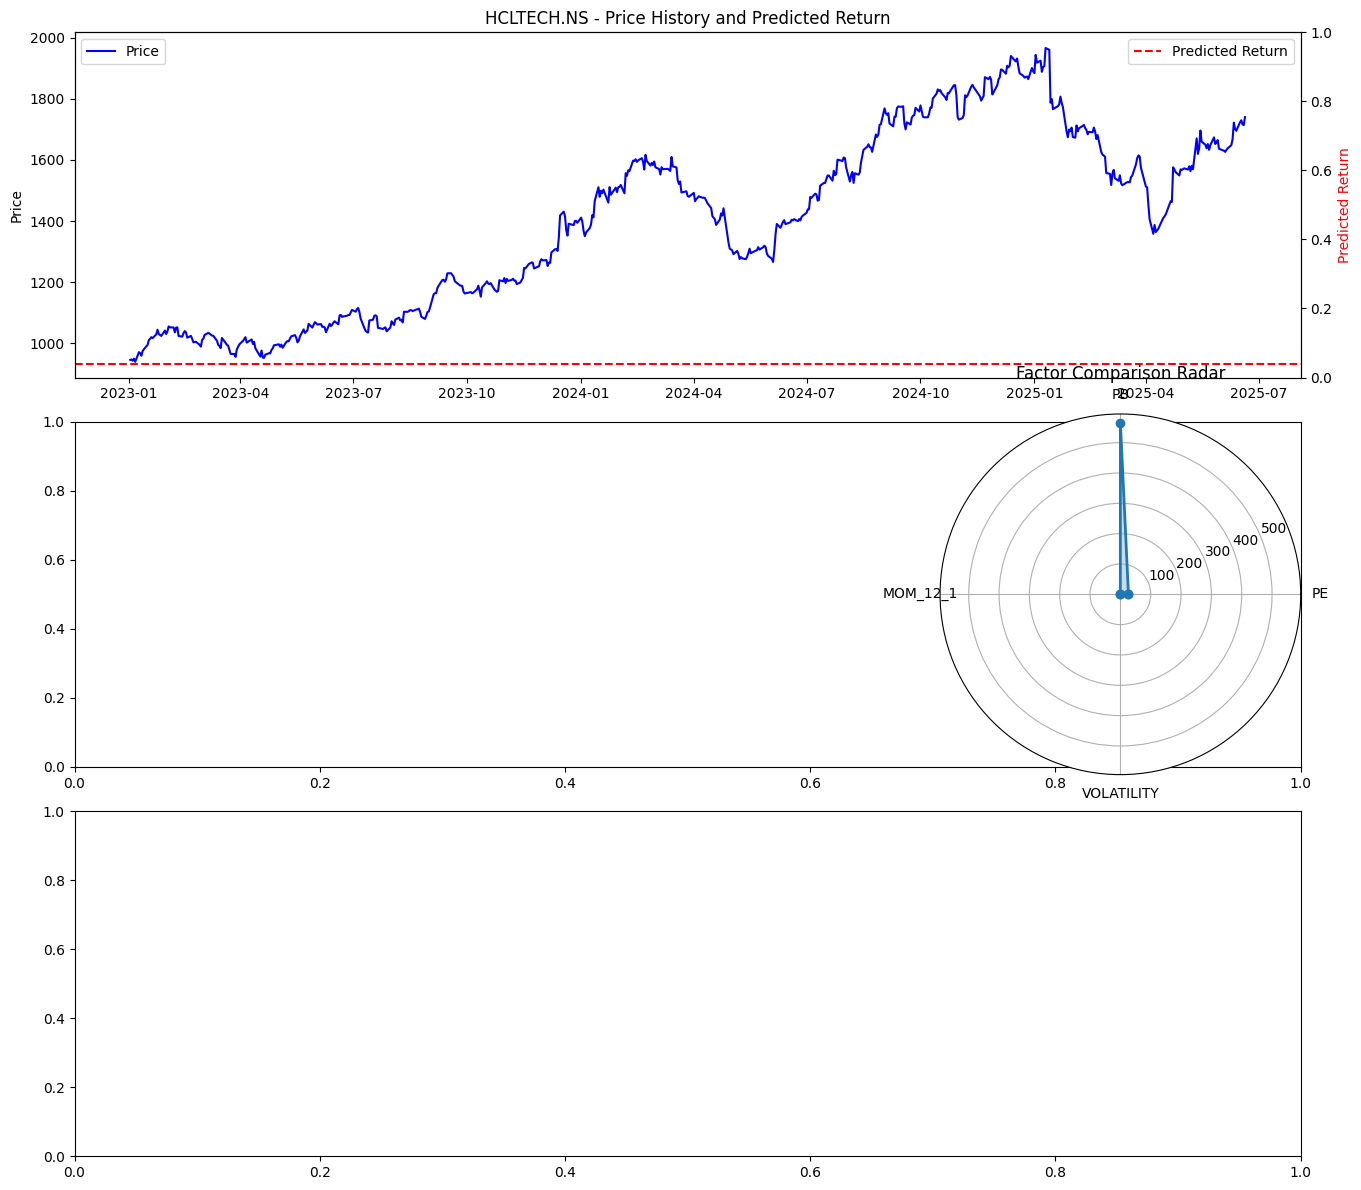

<Figure size 1400x800 with 0 Axes>

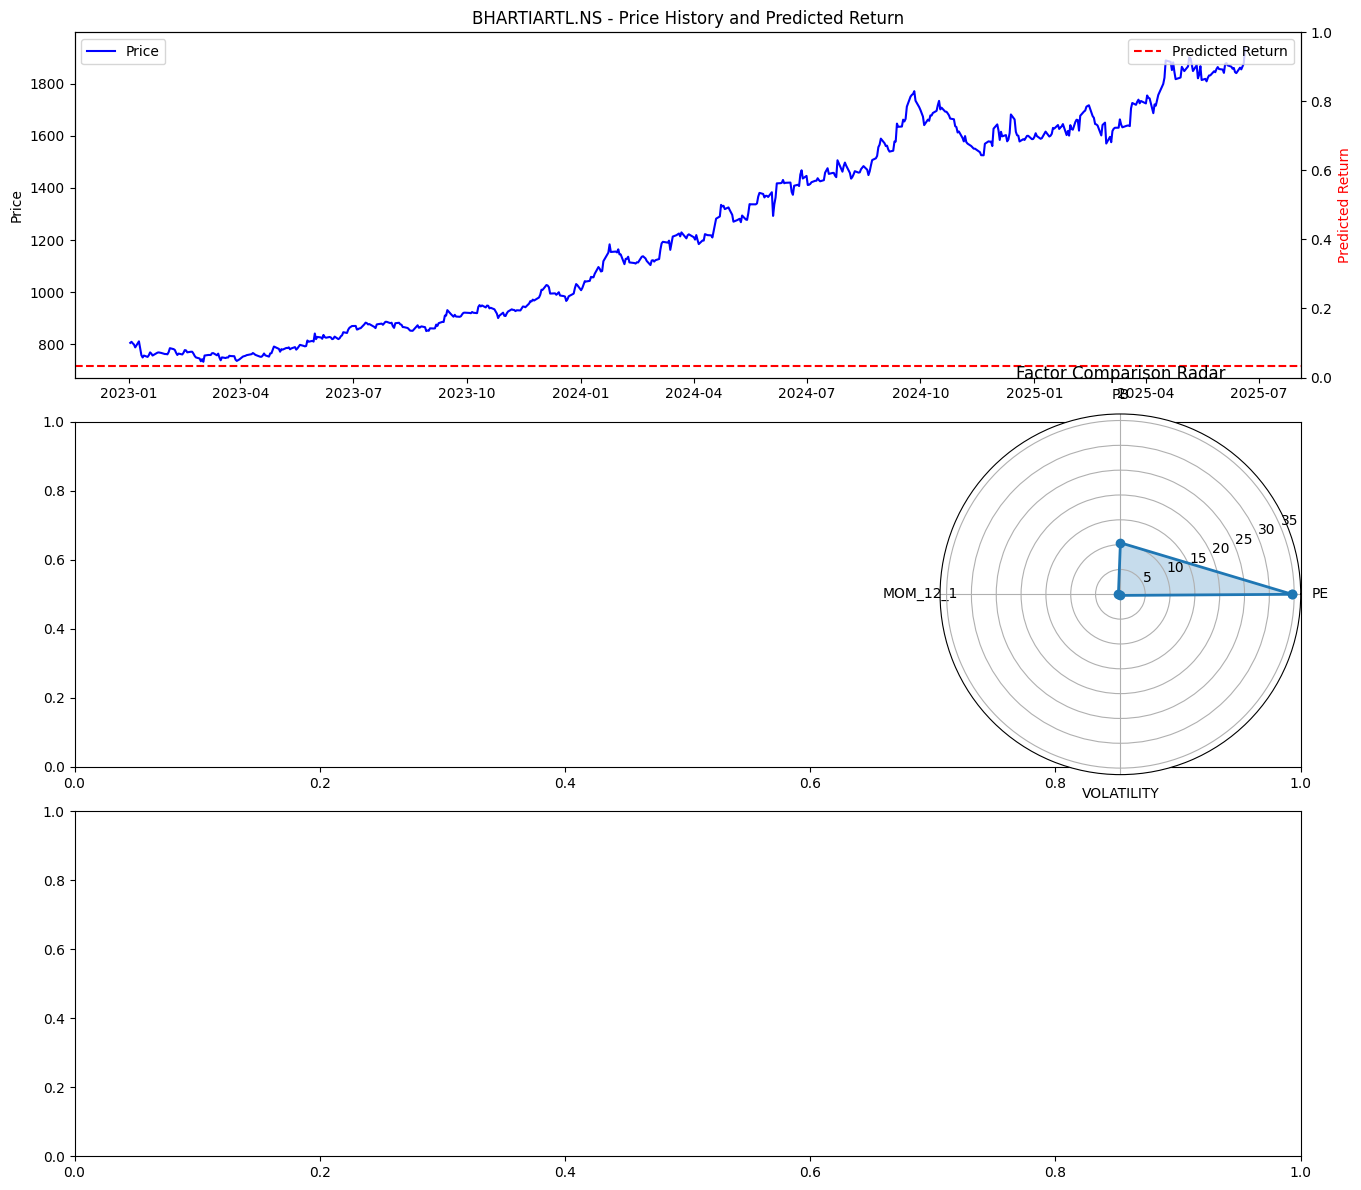

<Figure size 1400x800 with 0 Axes>

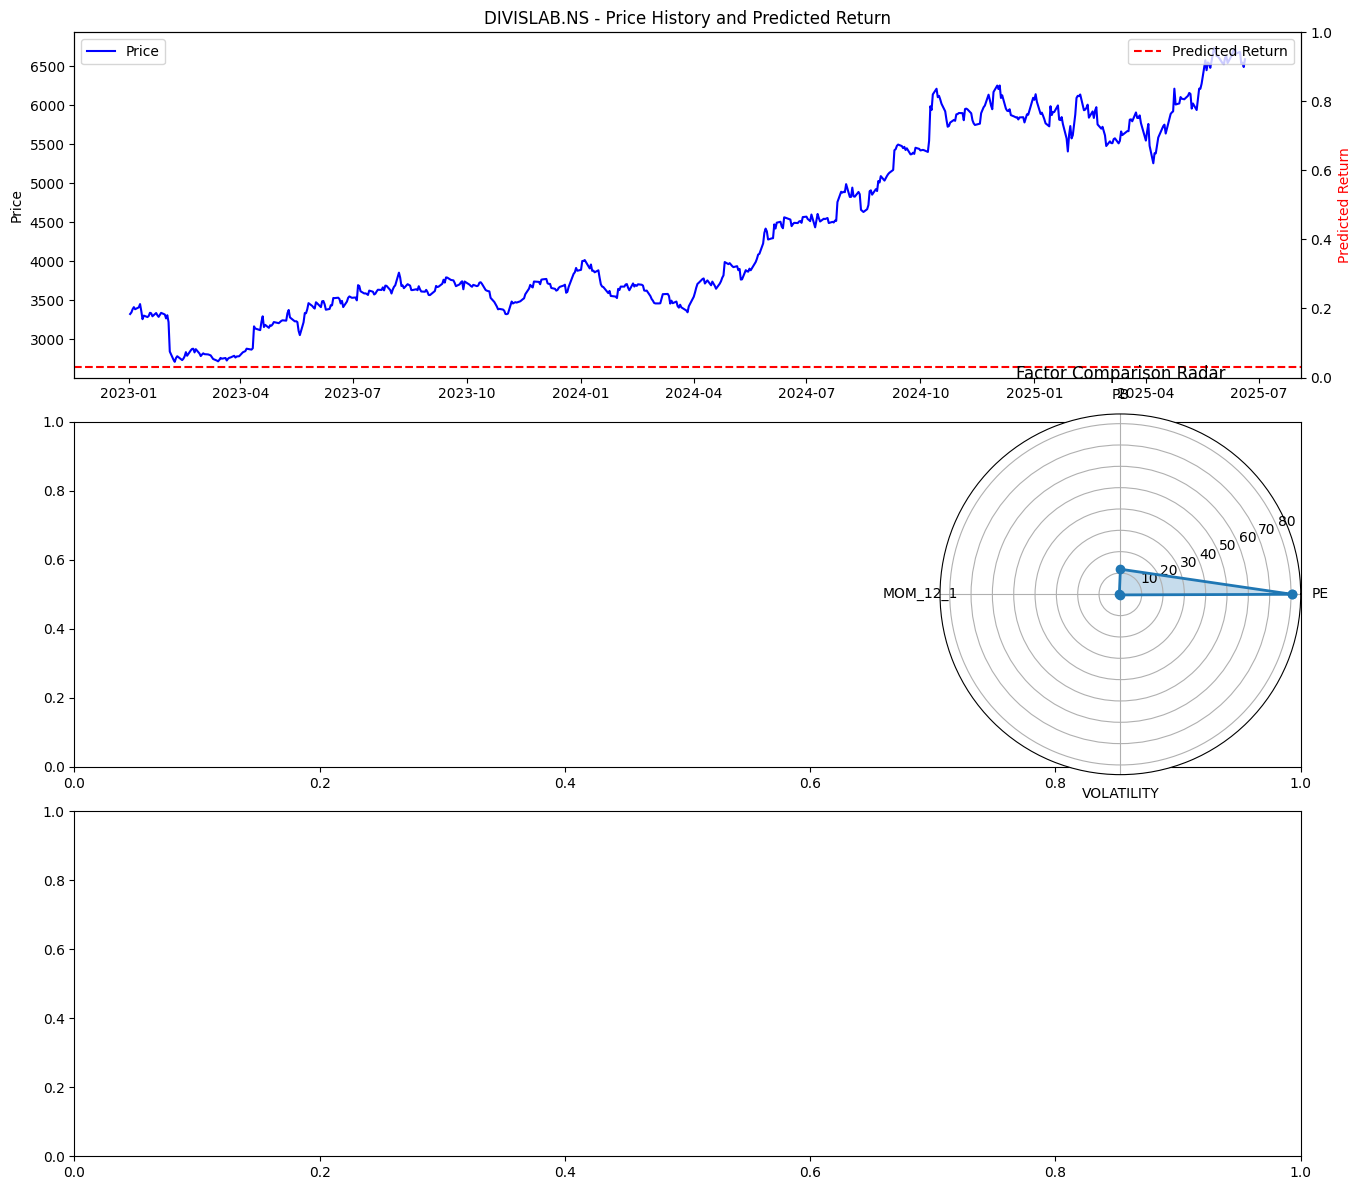

<Figure size 1400x800 with 0 Axes>

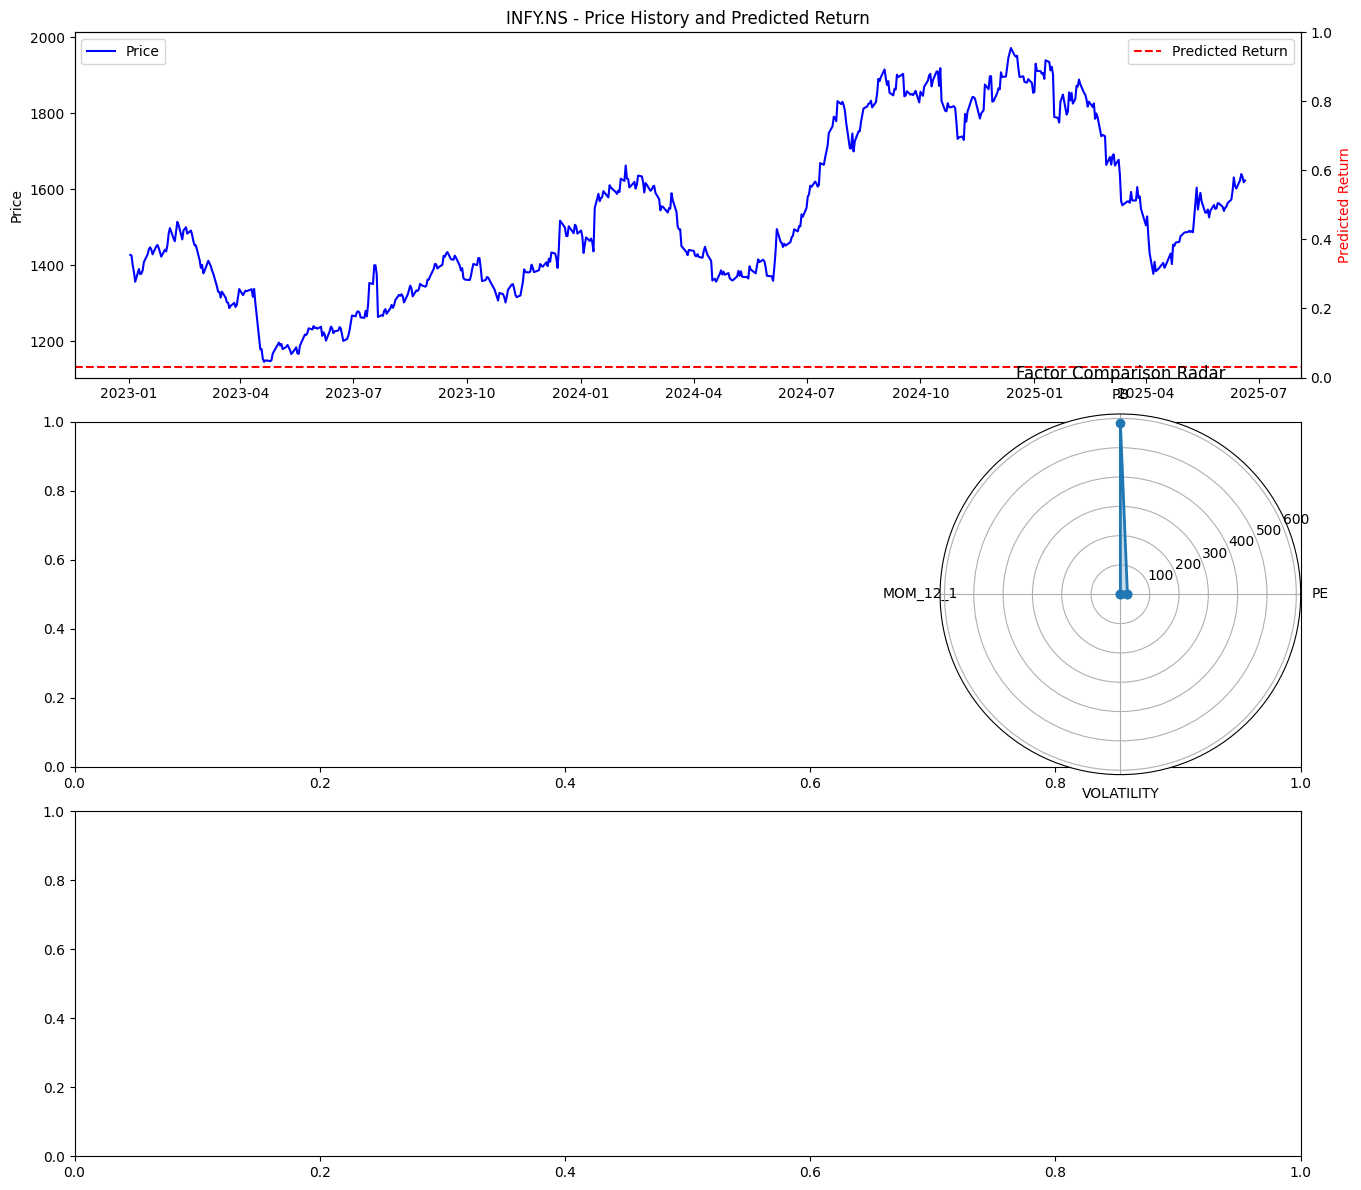

<Figure size 1400x800 with 0 Axes>

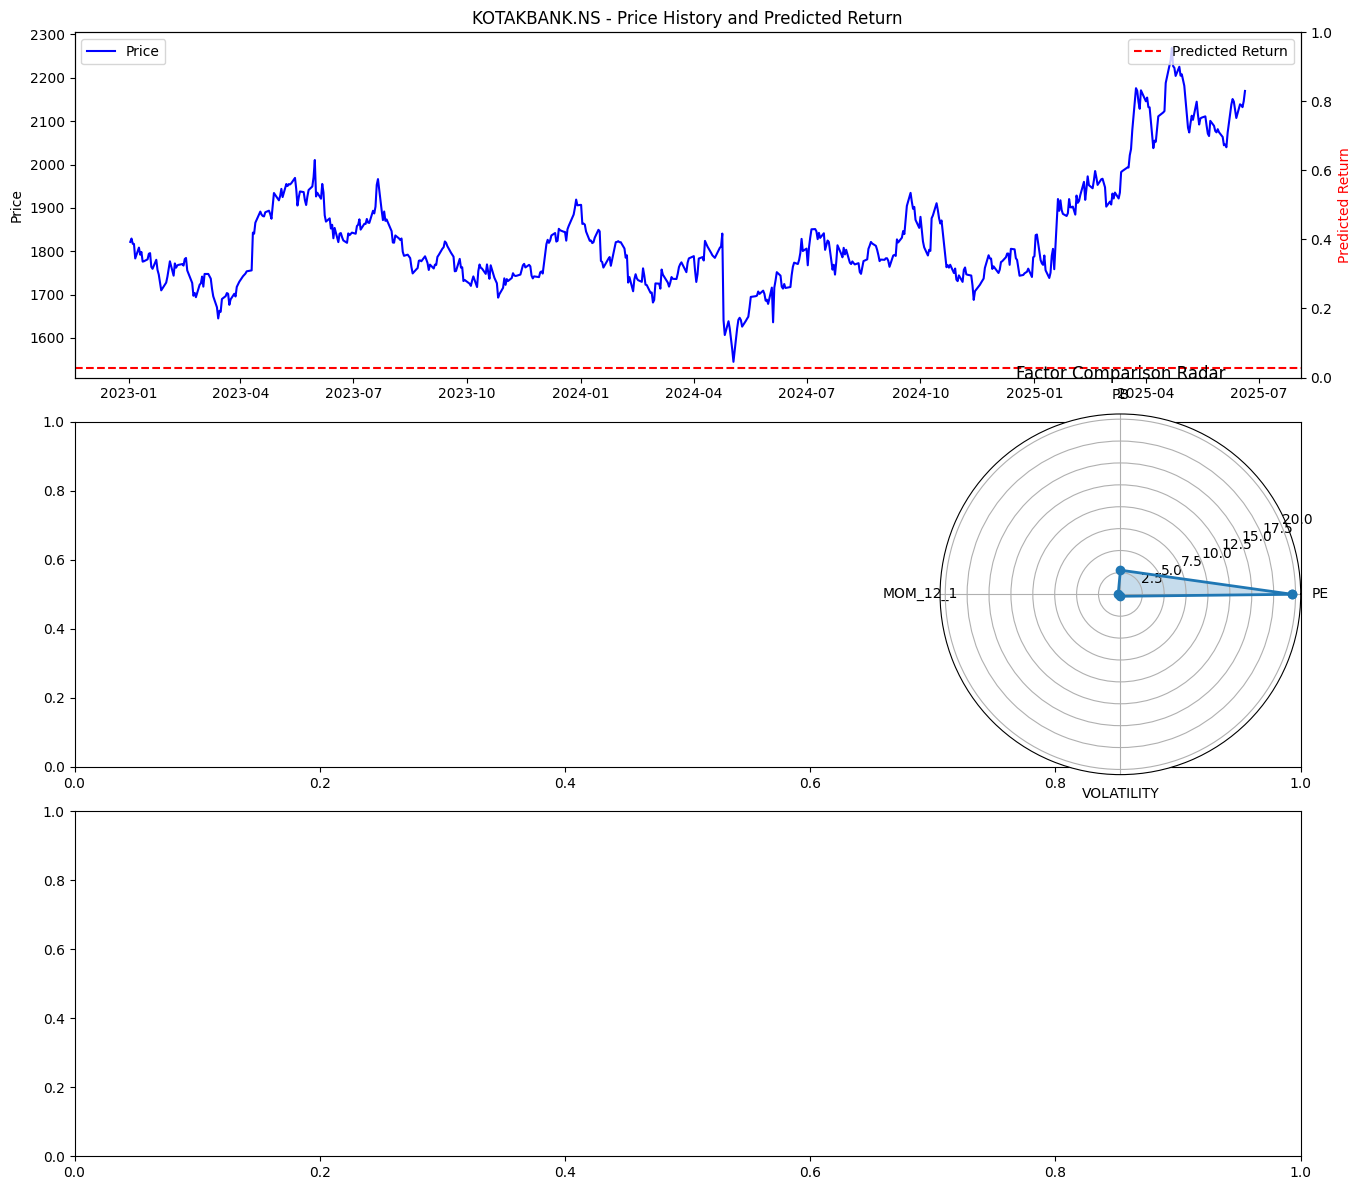

<Figure size 1400x800 with 0 Axes>

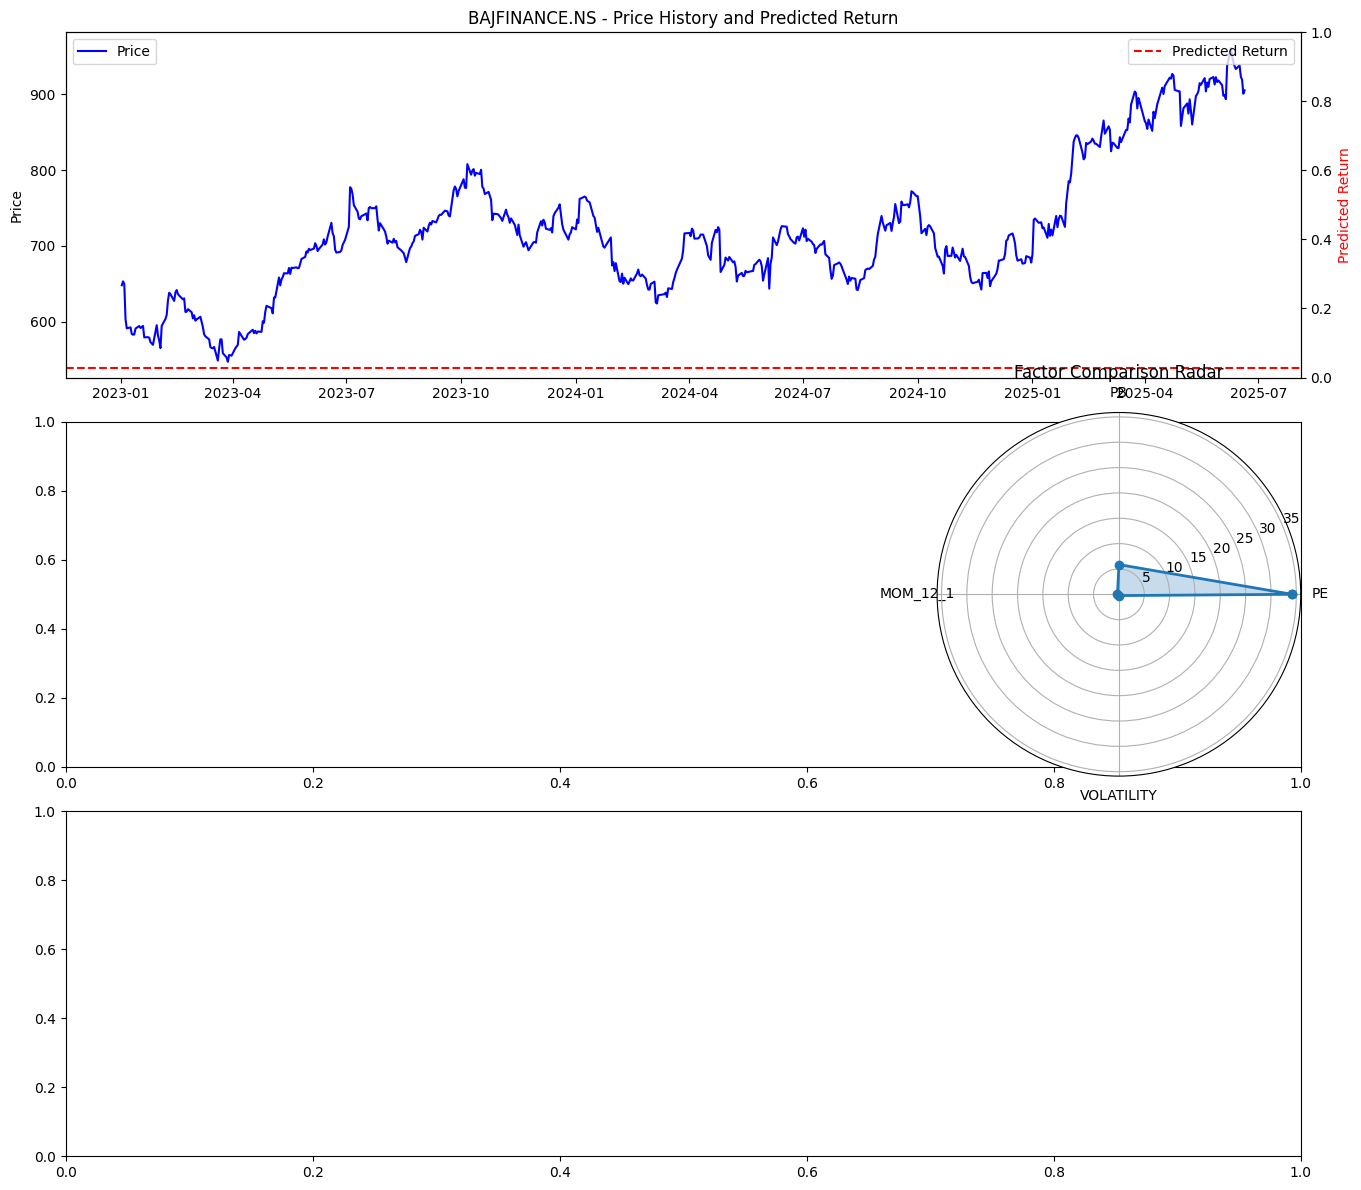

<Figure size 1400x800 with 0 Axes>

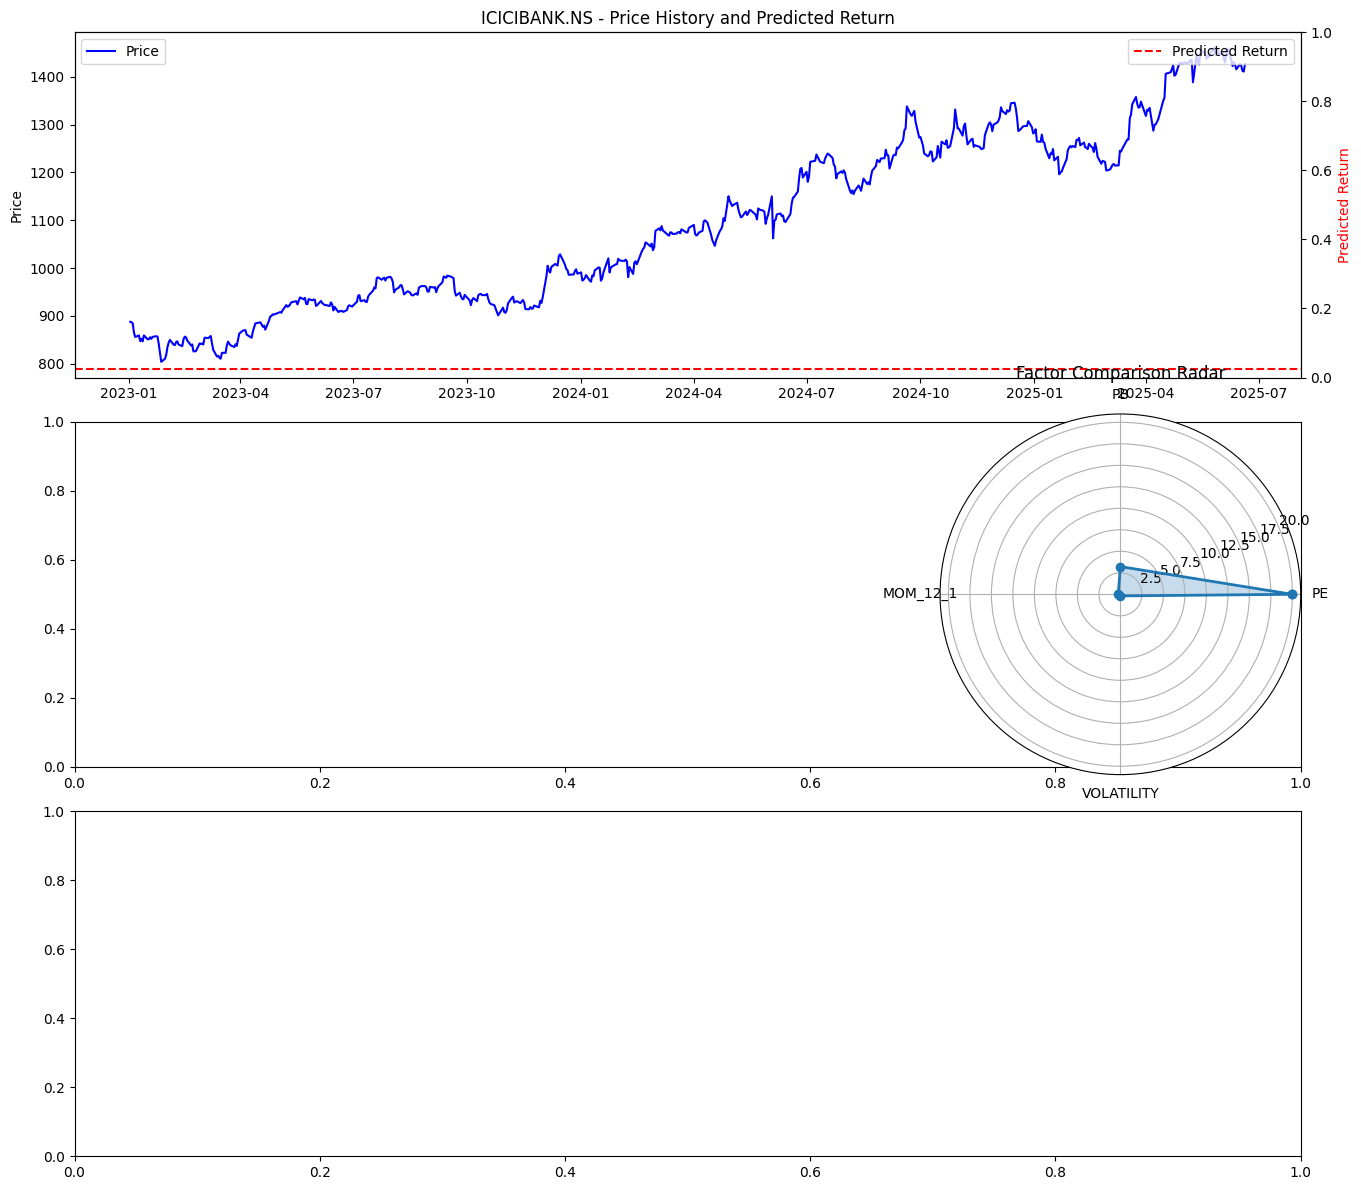

<Figure size 1400x800 with 0 Axes>

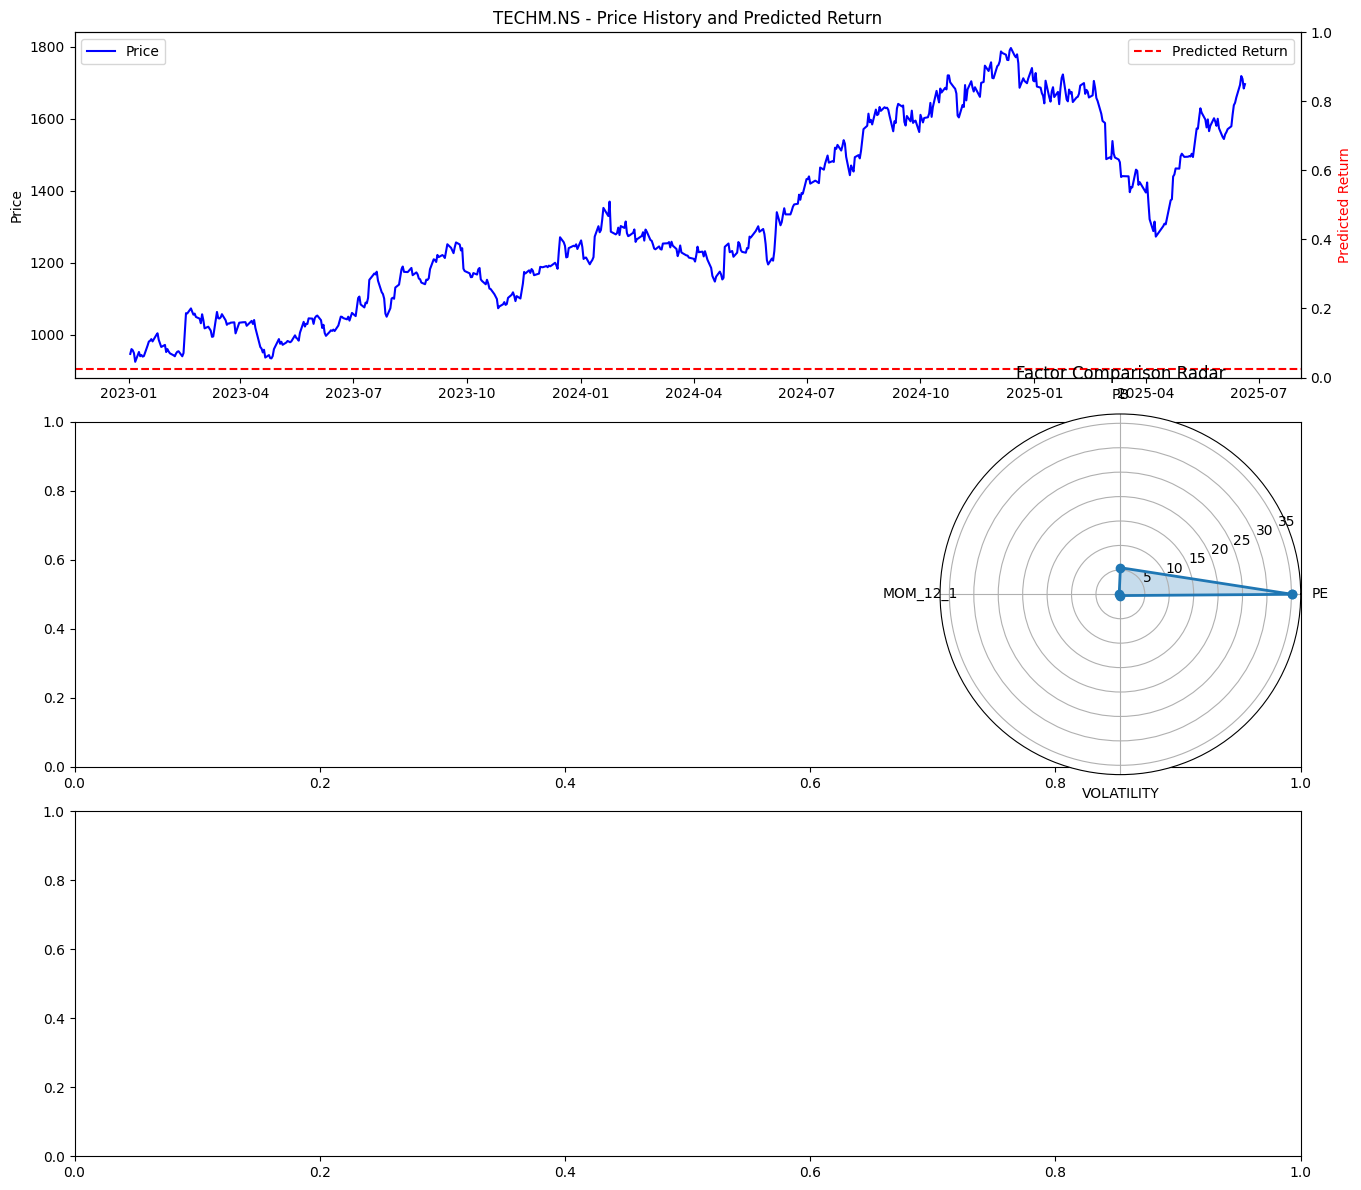

<Figure size 1400x800 with 0 Axes>

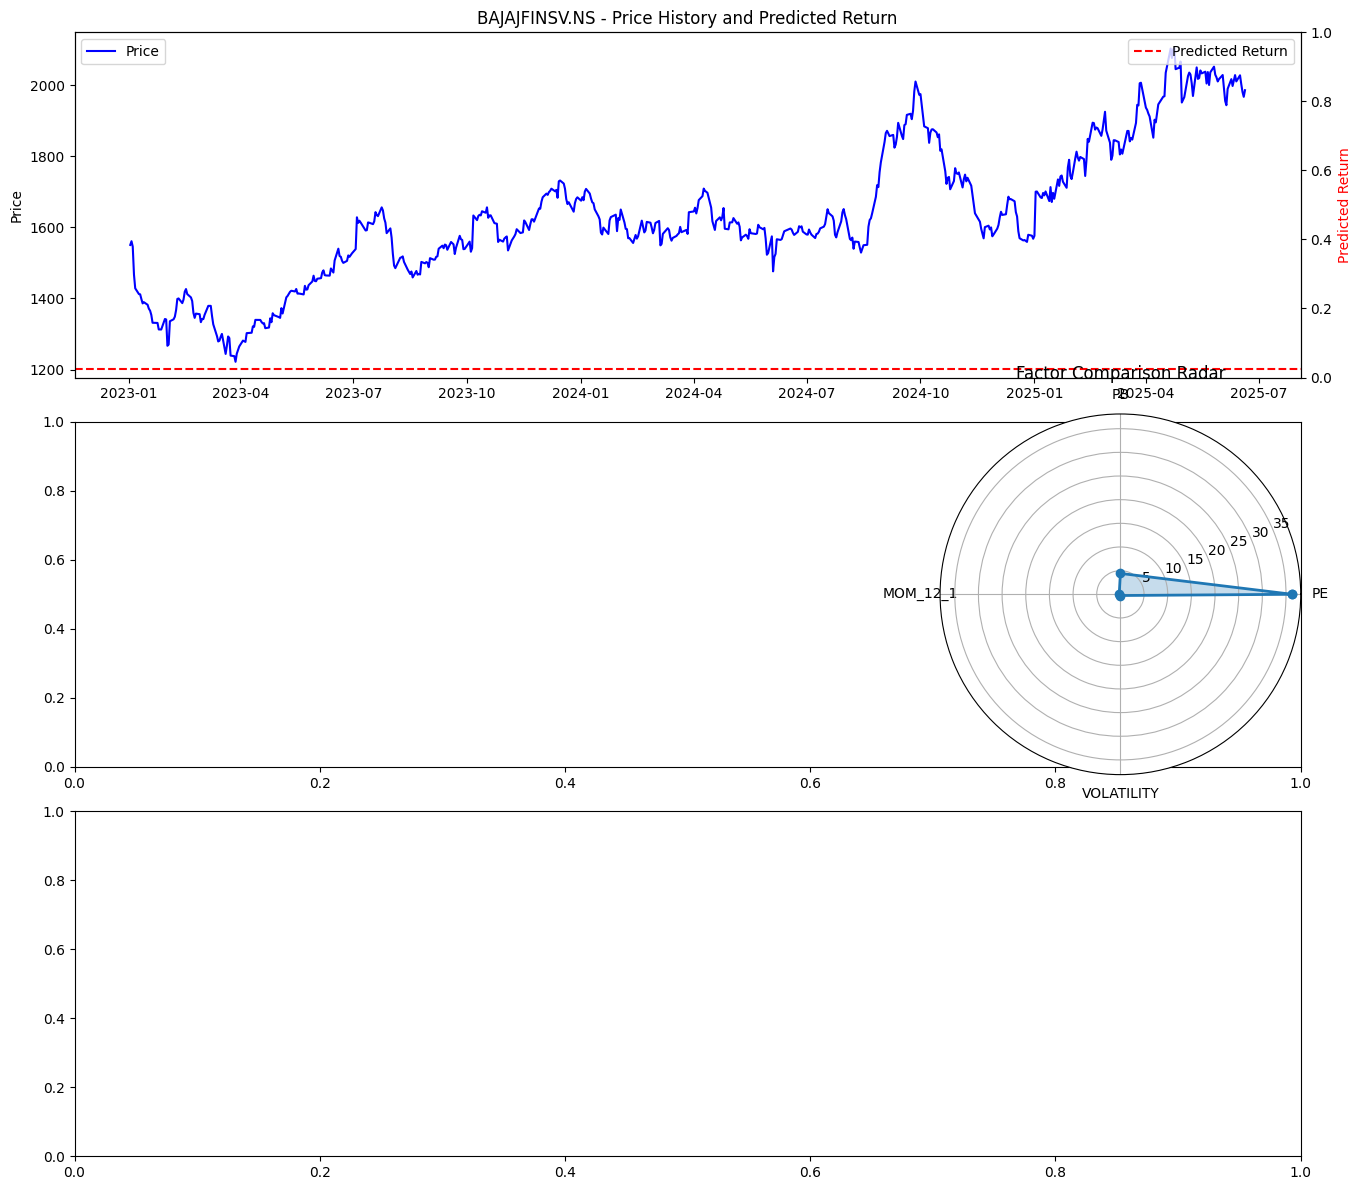

<Figure size 1400x800 with 0 Axes>

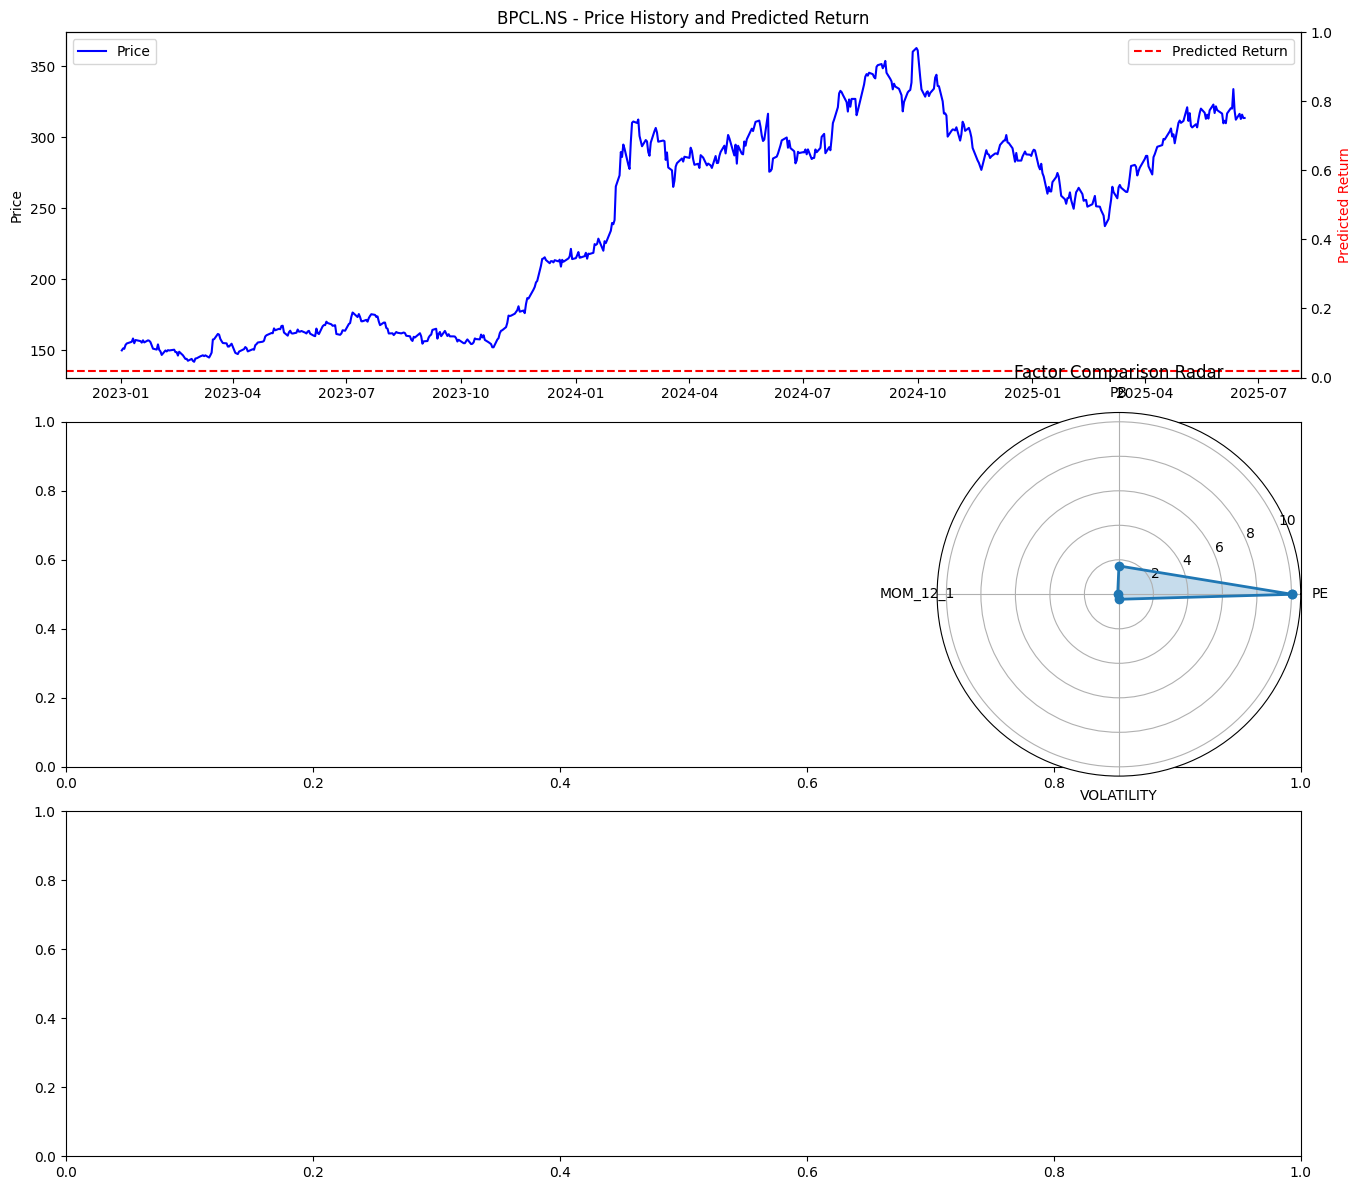

C:\Users\sanja\AppData\Local\Temp\ipykernel_78900\2514757730.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


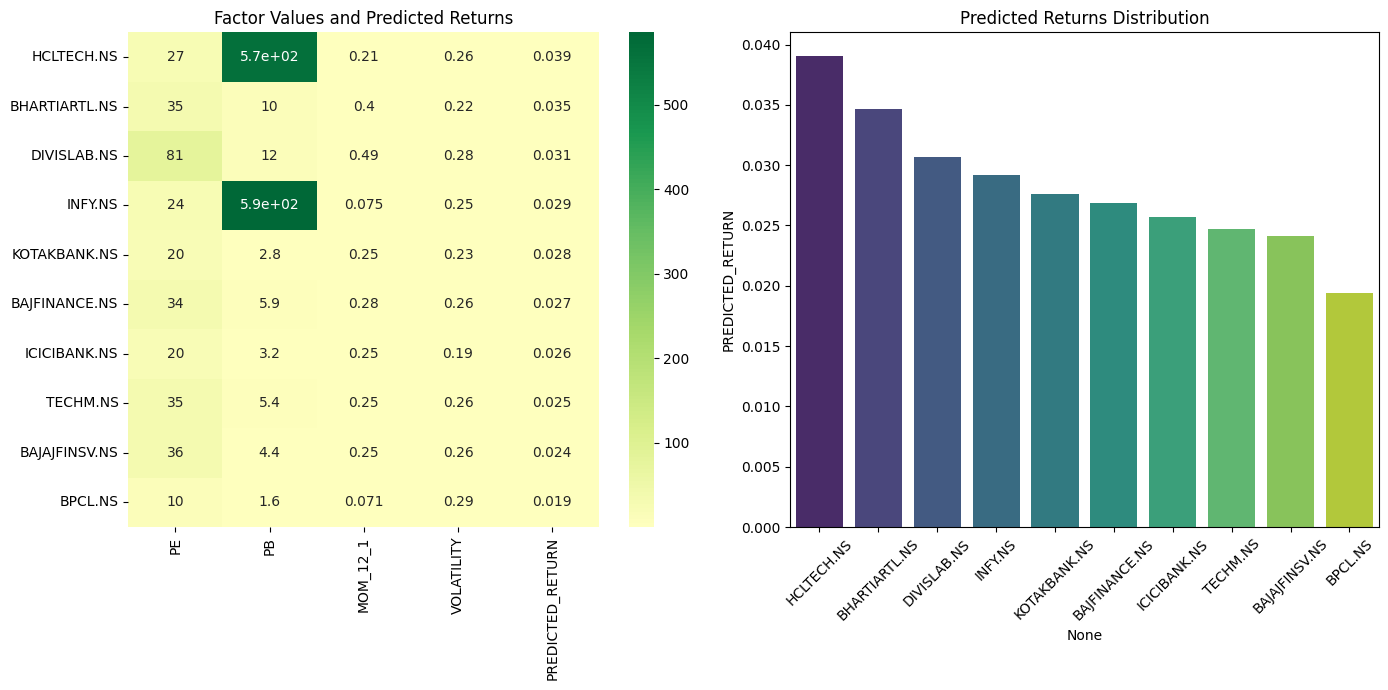

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 1. First get historical price data for all stocks with dates
tickers = factors_df.index.tolist()
price_data = yf.download(
    tickers=tickers,
    start="2023-01-01",  # Adjust date range as needed
    end=datetime.today().strftime('%Y-%m-%d'),
    group_by='ticker'
)

# 2. Prepare plotting function
def plot_stock_factors(ticker):
    plt.figure(figsize=(14, 8))
    
    # Get price history for this stock
    stock_prices = price_data[ticker]['Close']
    
    # Create subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
    
    # Plot 1: Price and Predicted Return
    ax1.plot(stock_prices, label='Price', color='blue')
    ax1.set_title(f'{ticker} - Price History and Predicted Return')
    ax1.set_ylabel('Price')
    ax1.legend(loc='upper left')
    
    ax1b = ax1.twinx()
    predicted_return = factors_df.loc[ticker, 'PREDICTED_RETURN']
    ax1b.axhline(predicted_return, color='red', linestyle='--', label='Predicted Return')
    ax1b.set_ylabel('Predicted Return', color='red')
    ax1b.legend(loc='upper right')
    
    # Plot 2: Factor Values Over Time (if you have historical factors)
    if 'date' in factors_df.columns:
        stock_factors = factors_df[factors_df.index == ticker].sort_values('date')
        ax2.plot(stock_factors['date'], stock_factors['PE'], label='PE')
        ax2.plot(stock_factors['date'], stock_factors['PB'], label='PB')
        ax2.plot(stock_factors['date'], stock_factors['MOM_12_1'], label='12M Momentum')
        ax2.set_title('Factor Values Over Time')
        ax2.legend()
    
    # Plot 3: Current Factor Comparison (Radar Chart)
    factors = ['PE', 'PB', 'MOM_12_1', 'VOLATILITY']
    values = factors_df.loc[ticker, factors].values
    values = np.append(values, values[0])  # Close the radar chart
    
    angles = np.linspace(0, 2*np.pi, len(factors)+1)
    ax3 = plt.subplot(133, polar=True)
    ax3.plot(angles, values, 'o-', linewidth=2)
    ax3.fill(angles, values, alpha=0.25)
    ax3.set_thetagrids(angles[:-1] * 180/np.pi, factors)
    ax3.set_title('Factor Comparison Radar')
    
    plt.tight_layout()
    plt.show()

# 3. Plot for each stock in portfolio
for ticker in portfolio.index:
    plot_stock_factors(ticker)

# 4. Composite Portfolio Visualization
plt.figure(figsize=(14, 7))

# Predicted Returns Heatmap
plt.subplot(121)
sns.heatmap(
    portfolio[['PE', 'PB', 'MOM_12_1', 'VOLATILITY', 'PREDICTED_RETURN']],
    annot=True,
    cmap='RdYlGn',
    center=0
)
plt.title('Factor Values and Predicted Returns')

# Predicted Returns Distribution
plt.subplot(122)
sns.barplot(
    x=portfolio.index,
    y='PREDICTED_RETURN',
    data=portfolio,
    palette='viridis'
)
plt.xticks(rotation=45)
plt.title('Predicted Returns Distribution')
plt.tight_layout()
plt.show()

In [214]:
factors_df.info

<bound method DataFrame.info of                      PE        PB          PS  MOM_12_1   MOM_6_1    MOM_1M  \
RELIANCE.NS   -0.345853 -0.250257    2.043567 -0.237707  0.183957  0.015333   
TCS.NS        -0.472886 -0.158118    4.808929 -0.686218 -0.185762 -0.032097   
ICICIBANK.NS  -0.692917 -0.242585    5.049727  1.189882  0.103505 -0.027728   
HINDUNILVR.NS  0.561431 -0.176662    8.468739 -0.553499 -0.025775 -0.039712   
INFY.NS       -0.523781  4.811991  340.565340  0.192507 -0.174655  0.016316   
ITC.NS        -0.432538 -0.206396    6.876468 -0.170169 -0.082243 -0.048259   
KOTAKBANK.NS  -0.707918 -0.246620    6.121223  1.191267  0.239487  0.045374   
SBIN.NS       -1.146882 -0.257979    2.056412 -0.538742 -0.032100 -0.005287   
BHARTIARTL.NS -0.083879 -0.180519    6.707727  2.019301  0.209961  0.048122   
LT.NS         -0.157083 -0.226758    1.897025 -0.143078 -0.026700 -0.008654   
BAJFINANCE.NS -0.101471 -0.219681   15.365901  1.349246  0.331419 -0.007608   
ASIANPAINT.NS  0.946